In [2]:
#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
    
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file_path = r'C:\Users\Bruger\Documents\Obesity_Dataset.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

   Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0    2   18     155                        2                         2   
1    2   18     158                        2                         2   
2    2   18     159                        2                         2   
3    2   18     162                        2                         2   
4    2   18     165                        2                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  3                           1   
1                                  3                           1   
2                                  2                           1   
3                                  2                           2   
4                                  2                           1   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                          3        2                    1   
1                     

In [3]:
#dfv = df.values

In [4]:
# Convert data frame to array
#df = df.values
#df

In [5]:
#df.type()

In [6]:
print(df)

      Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0       2   18     155                        2                         2   
1       2   18     158                        2                         2   
2       2   18     159                        2                         2   
3       2   18     162                        2                         2   
4       2   18     165                        2                         1   
...   ...  ...     ...                      ...                       ...   
1605    2   51     165                        2                         1   
1606    2   51     163                        2                         1   
1607    2   52     162                        1                         2   
1608    2   53     168                        2                         1   
1609    2   54     170                        1                         1   

      Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0   

In [7]:
myarray = df.to_numpy()

In [8]:
print(myarray)

[[  2  18 155 ...   3   4   2]
 [  2  18 158 ...   3   3   2]
 [  2  18 159 ...   3   4   2]
 ...
 [  2  52 162 ...   1   1   4]
 [  2  53 168 ...   1   1   4]
 [  2  54 170 ...   3   1   4]]


In [9]:

# Get the shape (number of rows and columns)
print("\nShape of the dataset:")
print(myarray.shape)


Shape of the dataset:
(1610, 15)


In [10]:
#df.descripe()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

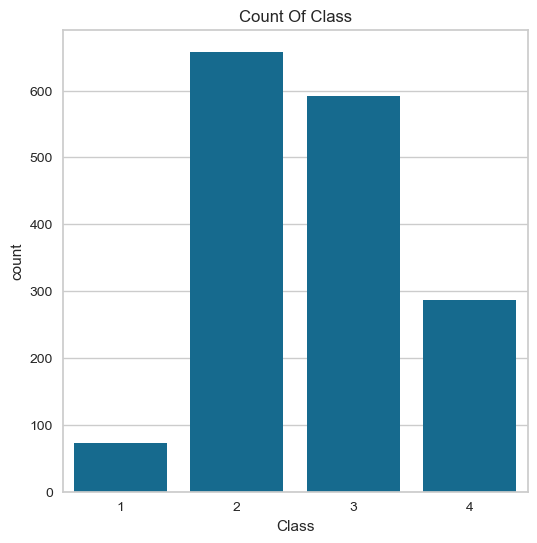

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Class')
plt.title("Count Of Class")
plt.show()

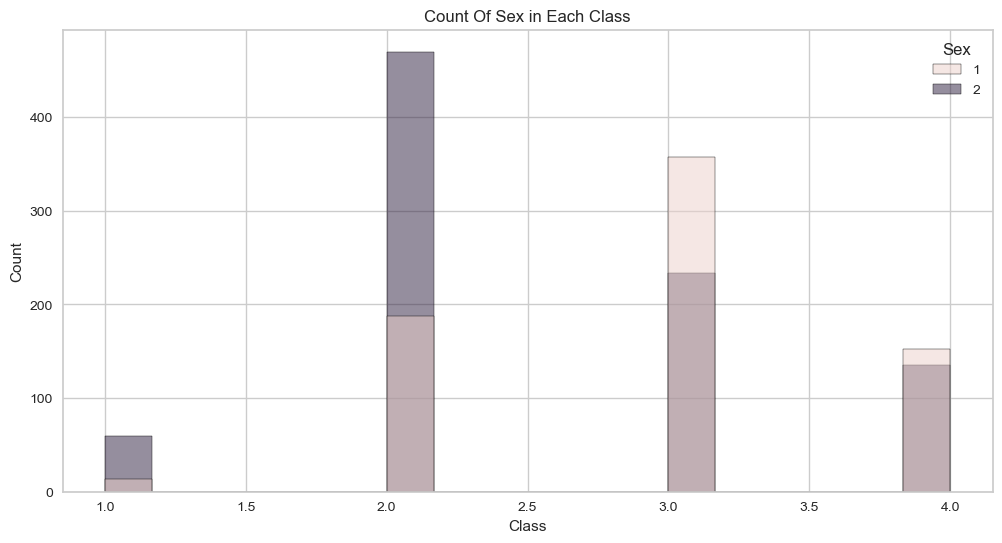

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Class',hue='Sex')
plt.title("Count Of Sex in Each Class")
plt.show()

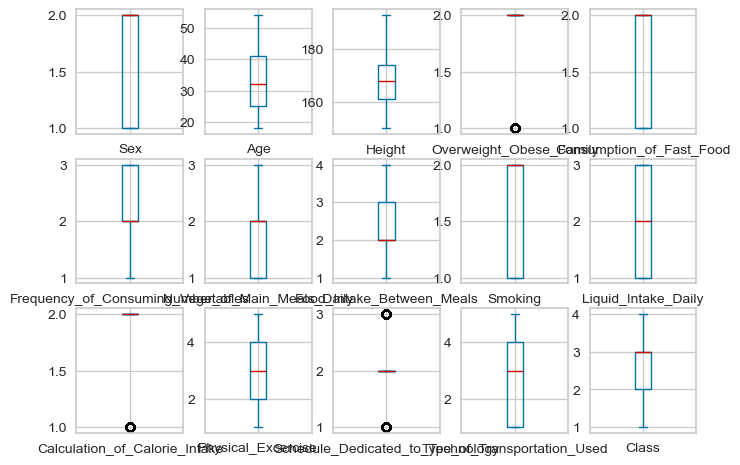

In [14]:
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

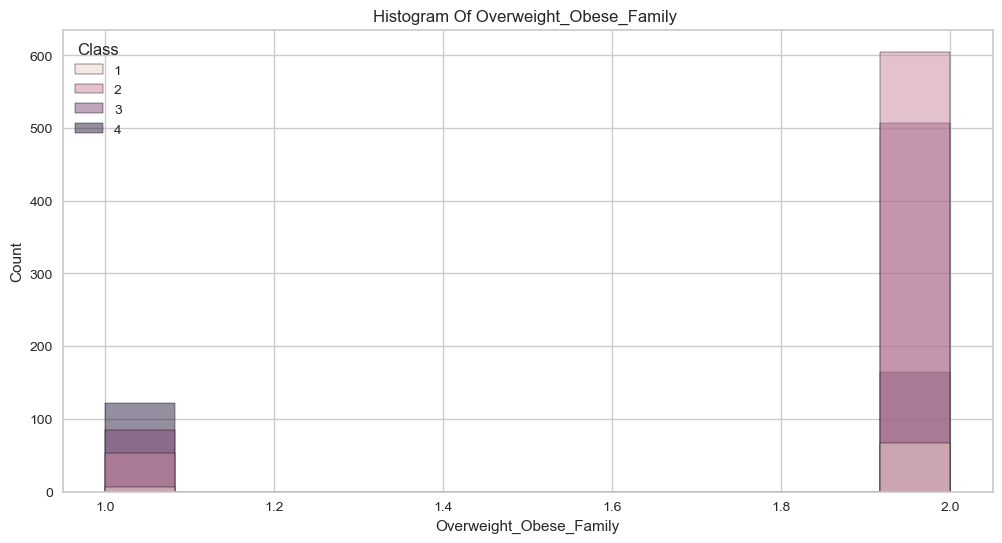

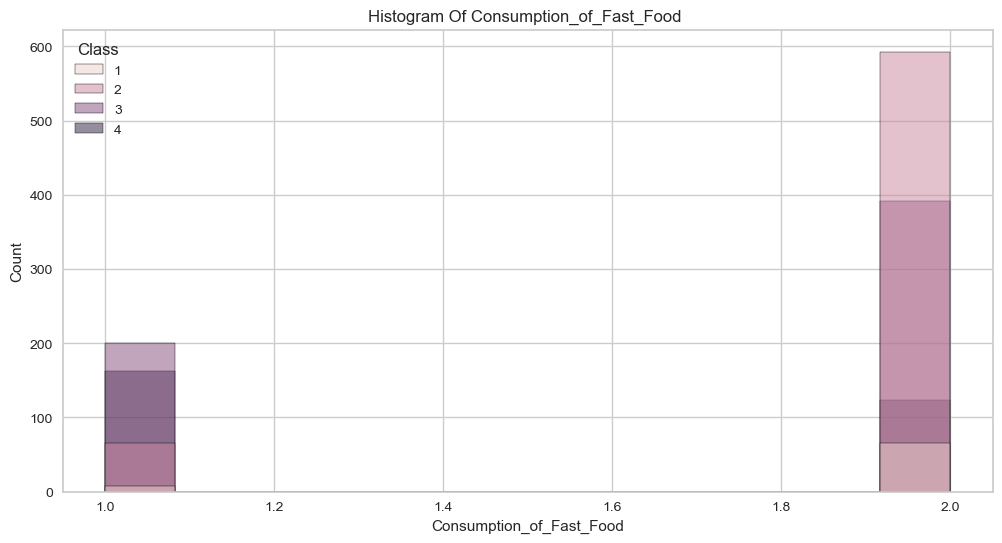

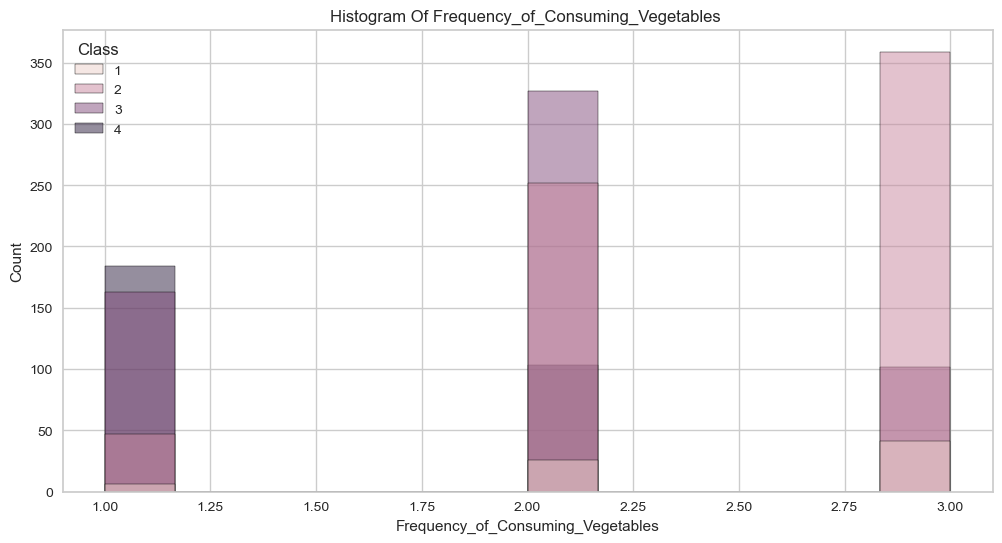

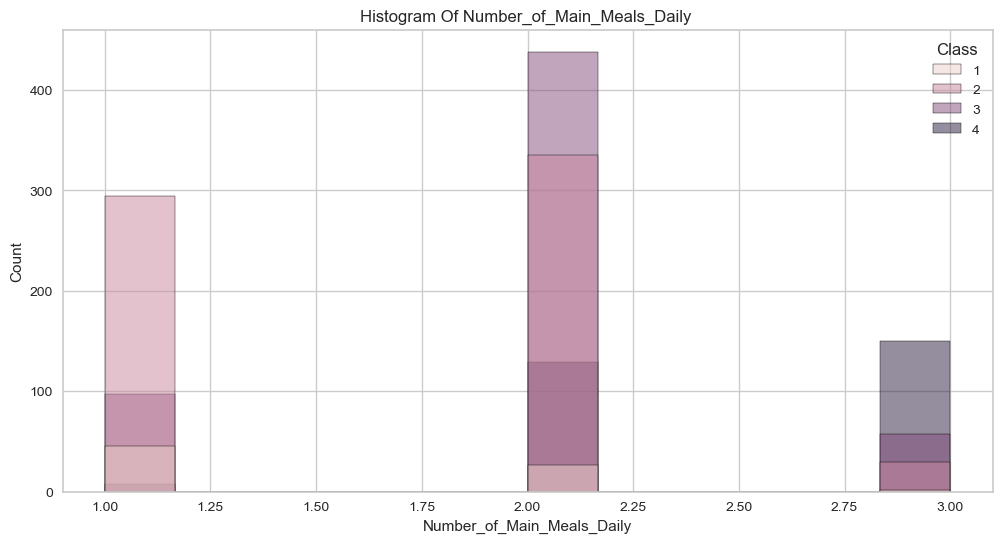

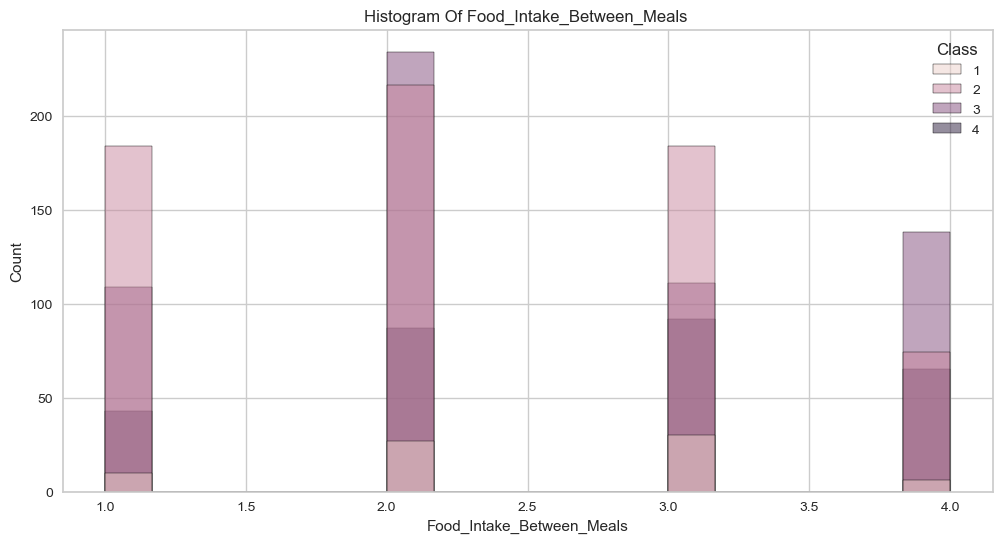

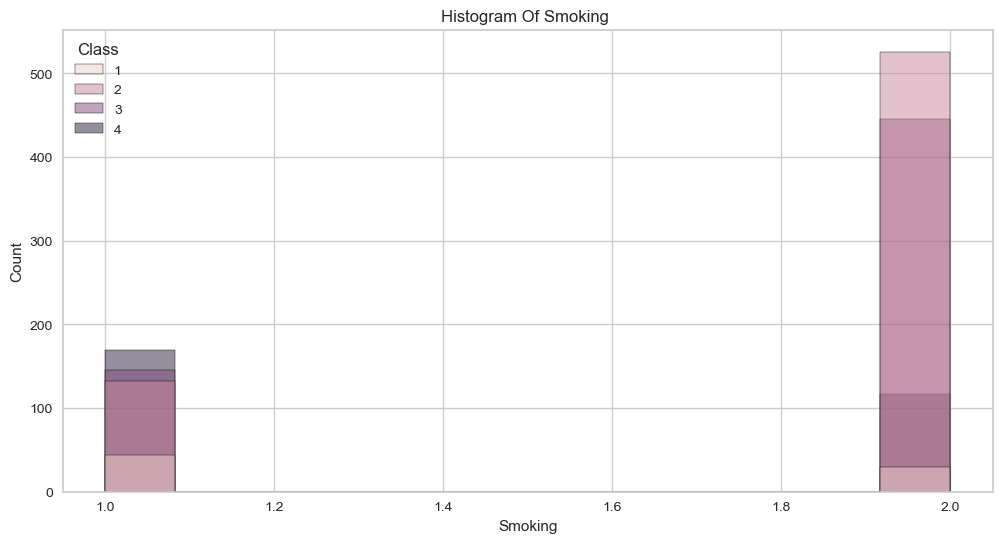

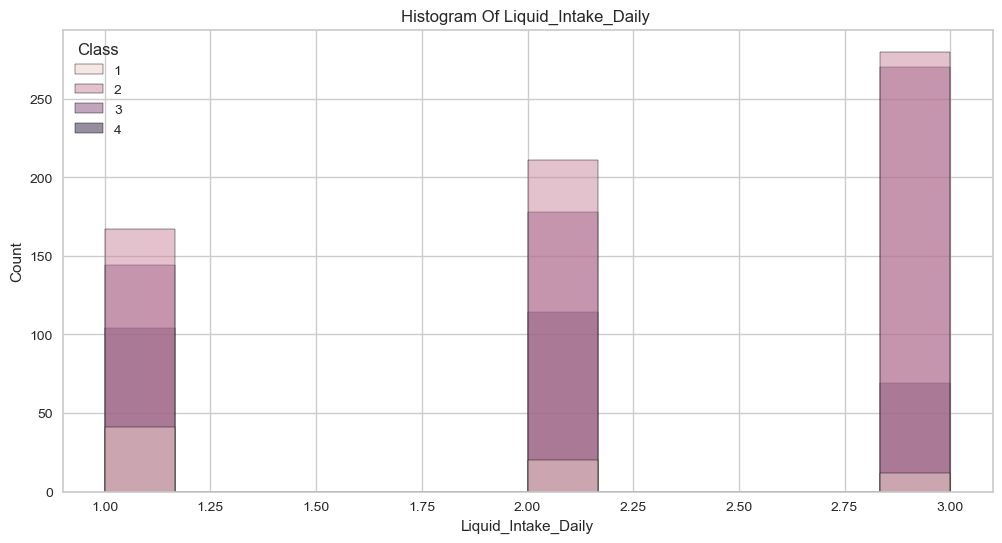

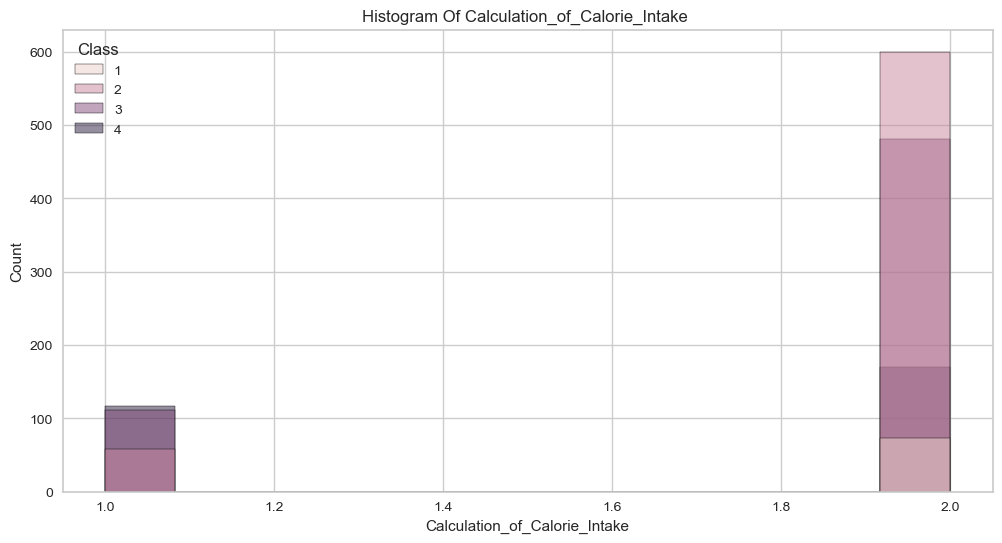

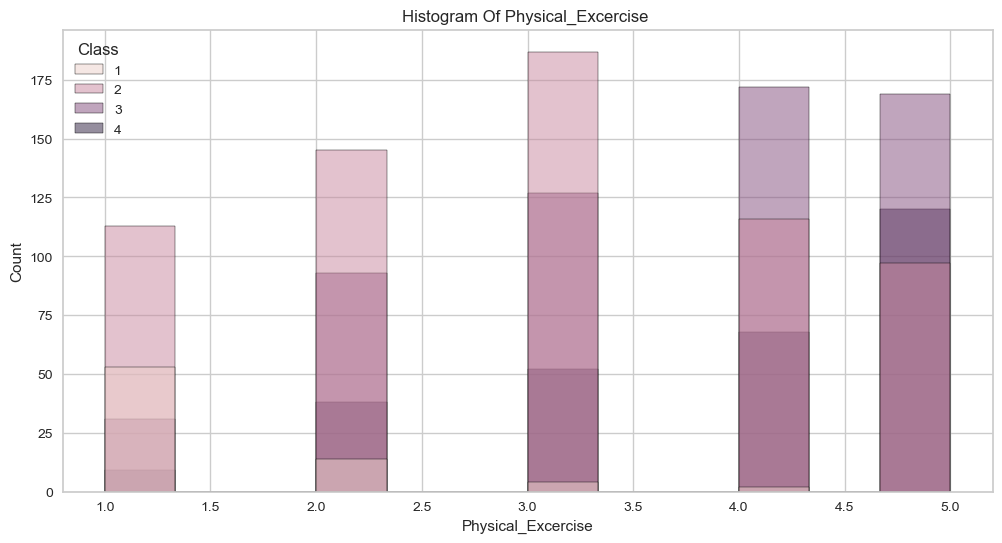

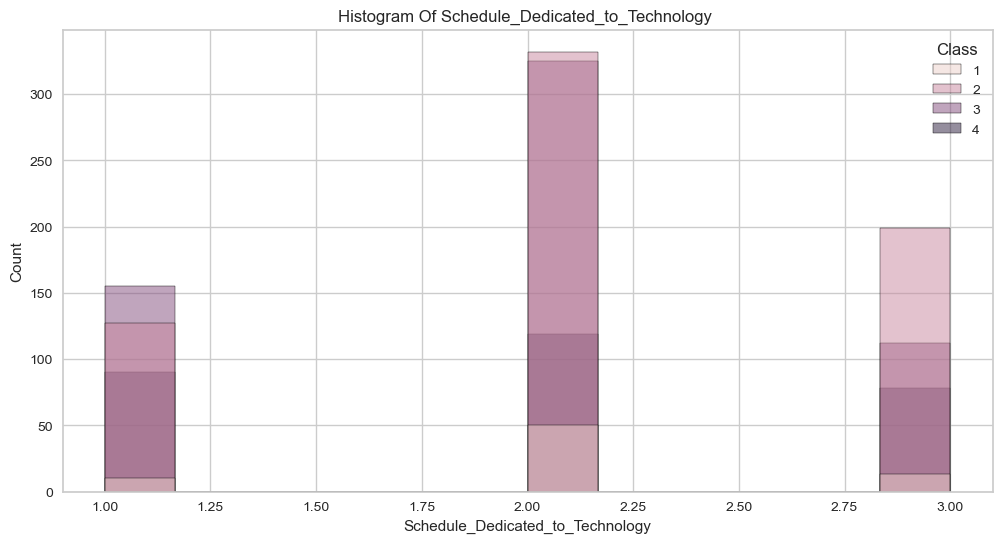

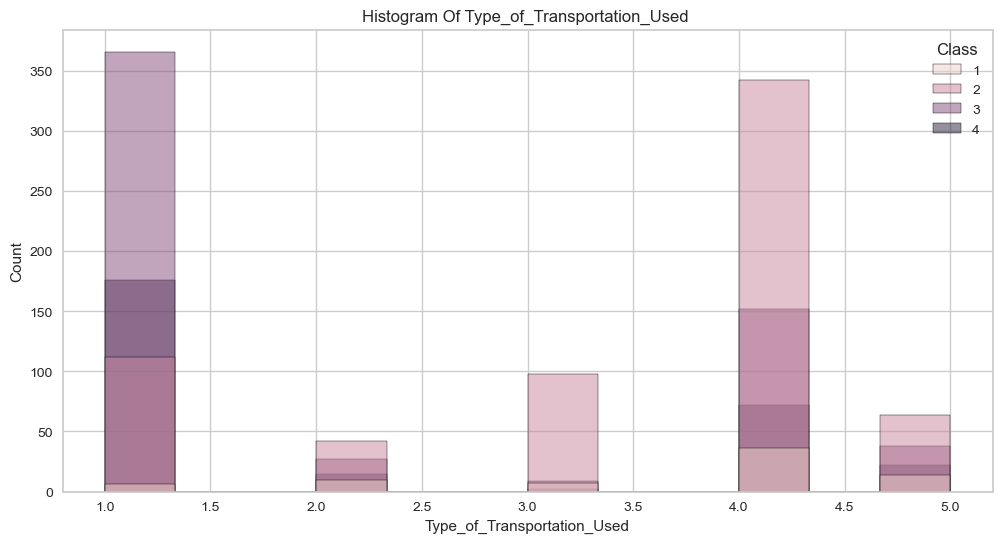

In [15]:
columns = ['Overweight_Obese_Family', 'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
           'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily',
           'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
           'Type_of_Transportation_Used']
for cols in columns:
        plt.figure(figsize=(12,6))
        sns.histplot(data=df, x=cols, hue='Class')
        plt.title(f"Histogram Of {cols} ")
    
        

In [16]:
#Preprocessing

In [17]:
x=df.drop('Class',axis=1)
y=df['Class']

In [18]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [19]:
df['Age']

0       18
1       18
2       18
3       18
4       18
        ..
1605    51
1606    51
1607    52
1608    53
1609    54
Name: Age, Length: 1610, dtype: int64

In [20]:
#avgage = df['Age'].mean()
#avgage

In [21]:
#avghgt = df['Height'].mean()

In [22]:
#stdage = df['Age'].std()
#stdage

In [23]:
#stdhgt = df['Height'].std()
#stdhgt

In [24]:
# Standardizing the 'height' column 
#if 'Height' in df.columns:
 #   df['Height'] = (df['Height']-avghgt)/stdhgt
  #  print("Height column has been standardized.")
#else:
 #   print("Height column not found in the dataset.")

In [25]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [26]:
agemin = df['Age'].min()
agemin

18

In [27]:
agemax = df['Age'].max()
agemax

54

In [28]:
hgtmin = df['Height'].min()
hgtmin

150

In [29]:
hgtmax = df['Height'].max()
hgtmax

193

In [30]:
# Standardizing the 'age' column
if 'Age' in df.columns:
    df['Age'] = (df['Age']-agemin) / (agemax-agemin)
    print("Age column has been standardized.")
else:
    print("Age column not found in the dataset.")

Age column has been standardized.


In [31]:
# Standardizing the 'height' column
if 'Height' in df.columns:
    df['Height'] = (df['Height']-hgtmin) / (hgtmax-hgtmin)
    print("Height column has been standardized.")
else:
    print("Height column not found in the dataset.")

Height column has been standardized.


In [32]:
df

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,0.000000,0.116279,2,2,3,1,3,2,1,2,3,3,4,2
1,2,0.000000,0.186047,2,2,3,1,1,2,1,2,1,3,3,2
2,2,0.000000,0.209302,2,2,2,1,3,2,3,2,2,3,4,2
3,2,0.000000,0.279070,2,2,2,2,2,2,2,2,1,3,4,2
4,2,0.000000,0.348837,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,0.916667,0.348837,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,0.916667,0.302326,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,0.944444,0.279070,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,0.972222,0.418605,2,1,1,3,4,1,2,2,2,1,1,4


In [33]:
#Something is clearly wrong, but I can't figure out how my standardization has failed.

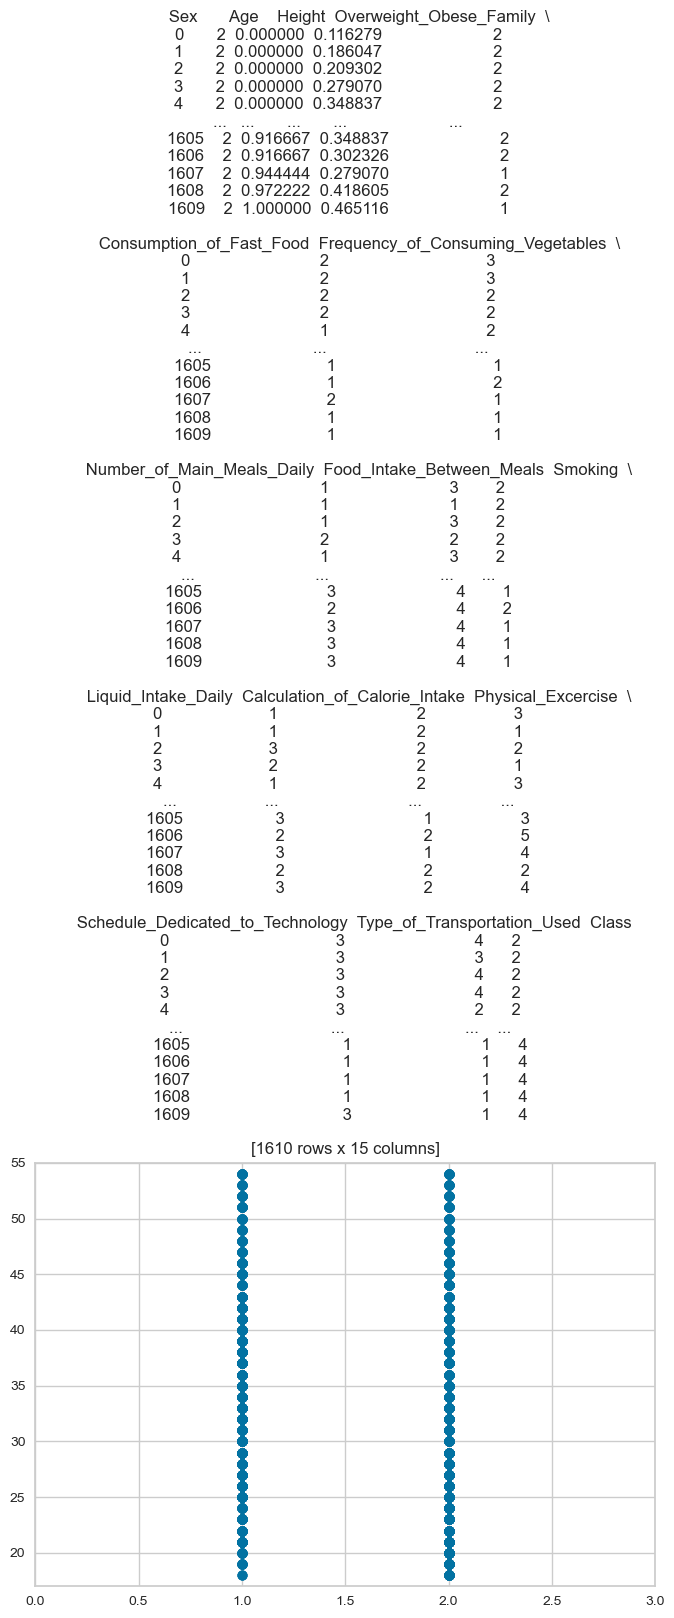

In [34]:
# Plot the data
plt.figure()

# Assuming 'df' is a DataFrame
plt.title(df)

# Calculate the range of coordinates using 'df'
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1  # Column 0 of df
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1  # Column 1 of df

# Example: plotting coordinates or data (this depends on what you're trying to plot)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1])  # Scatter plot for two columns in df
plt.show()

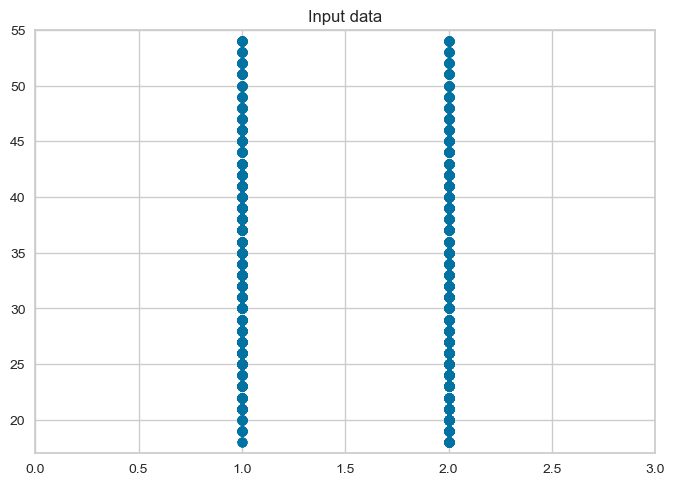

In [35]:
x = myarray

plt.title('Input data')

# Calculate the range of coordinates using 'x'
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1  # Column 0 of x
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1  # Column 1 of x

# Plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.scatter(x[:, 0], x[:, 1])  # Scatter plot for two columns in x
plt.show()

In [36]:
#Determing most relevant features for obesity

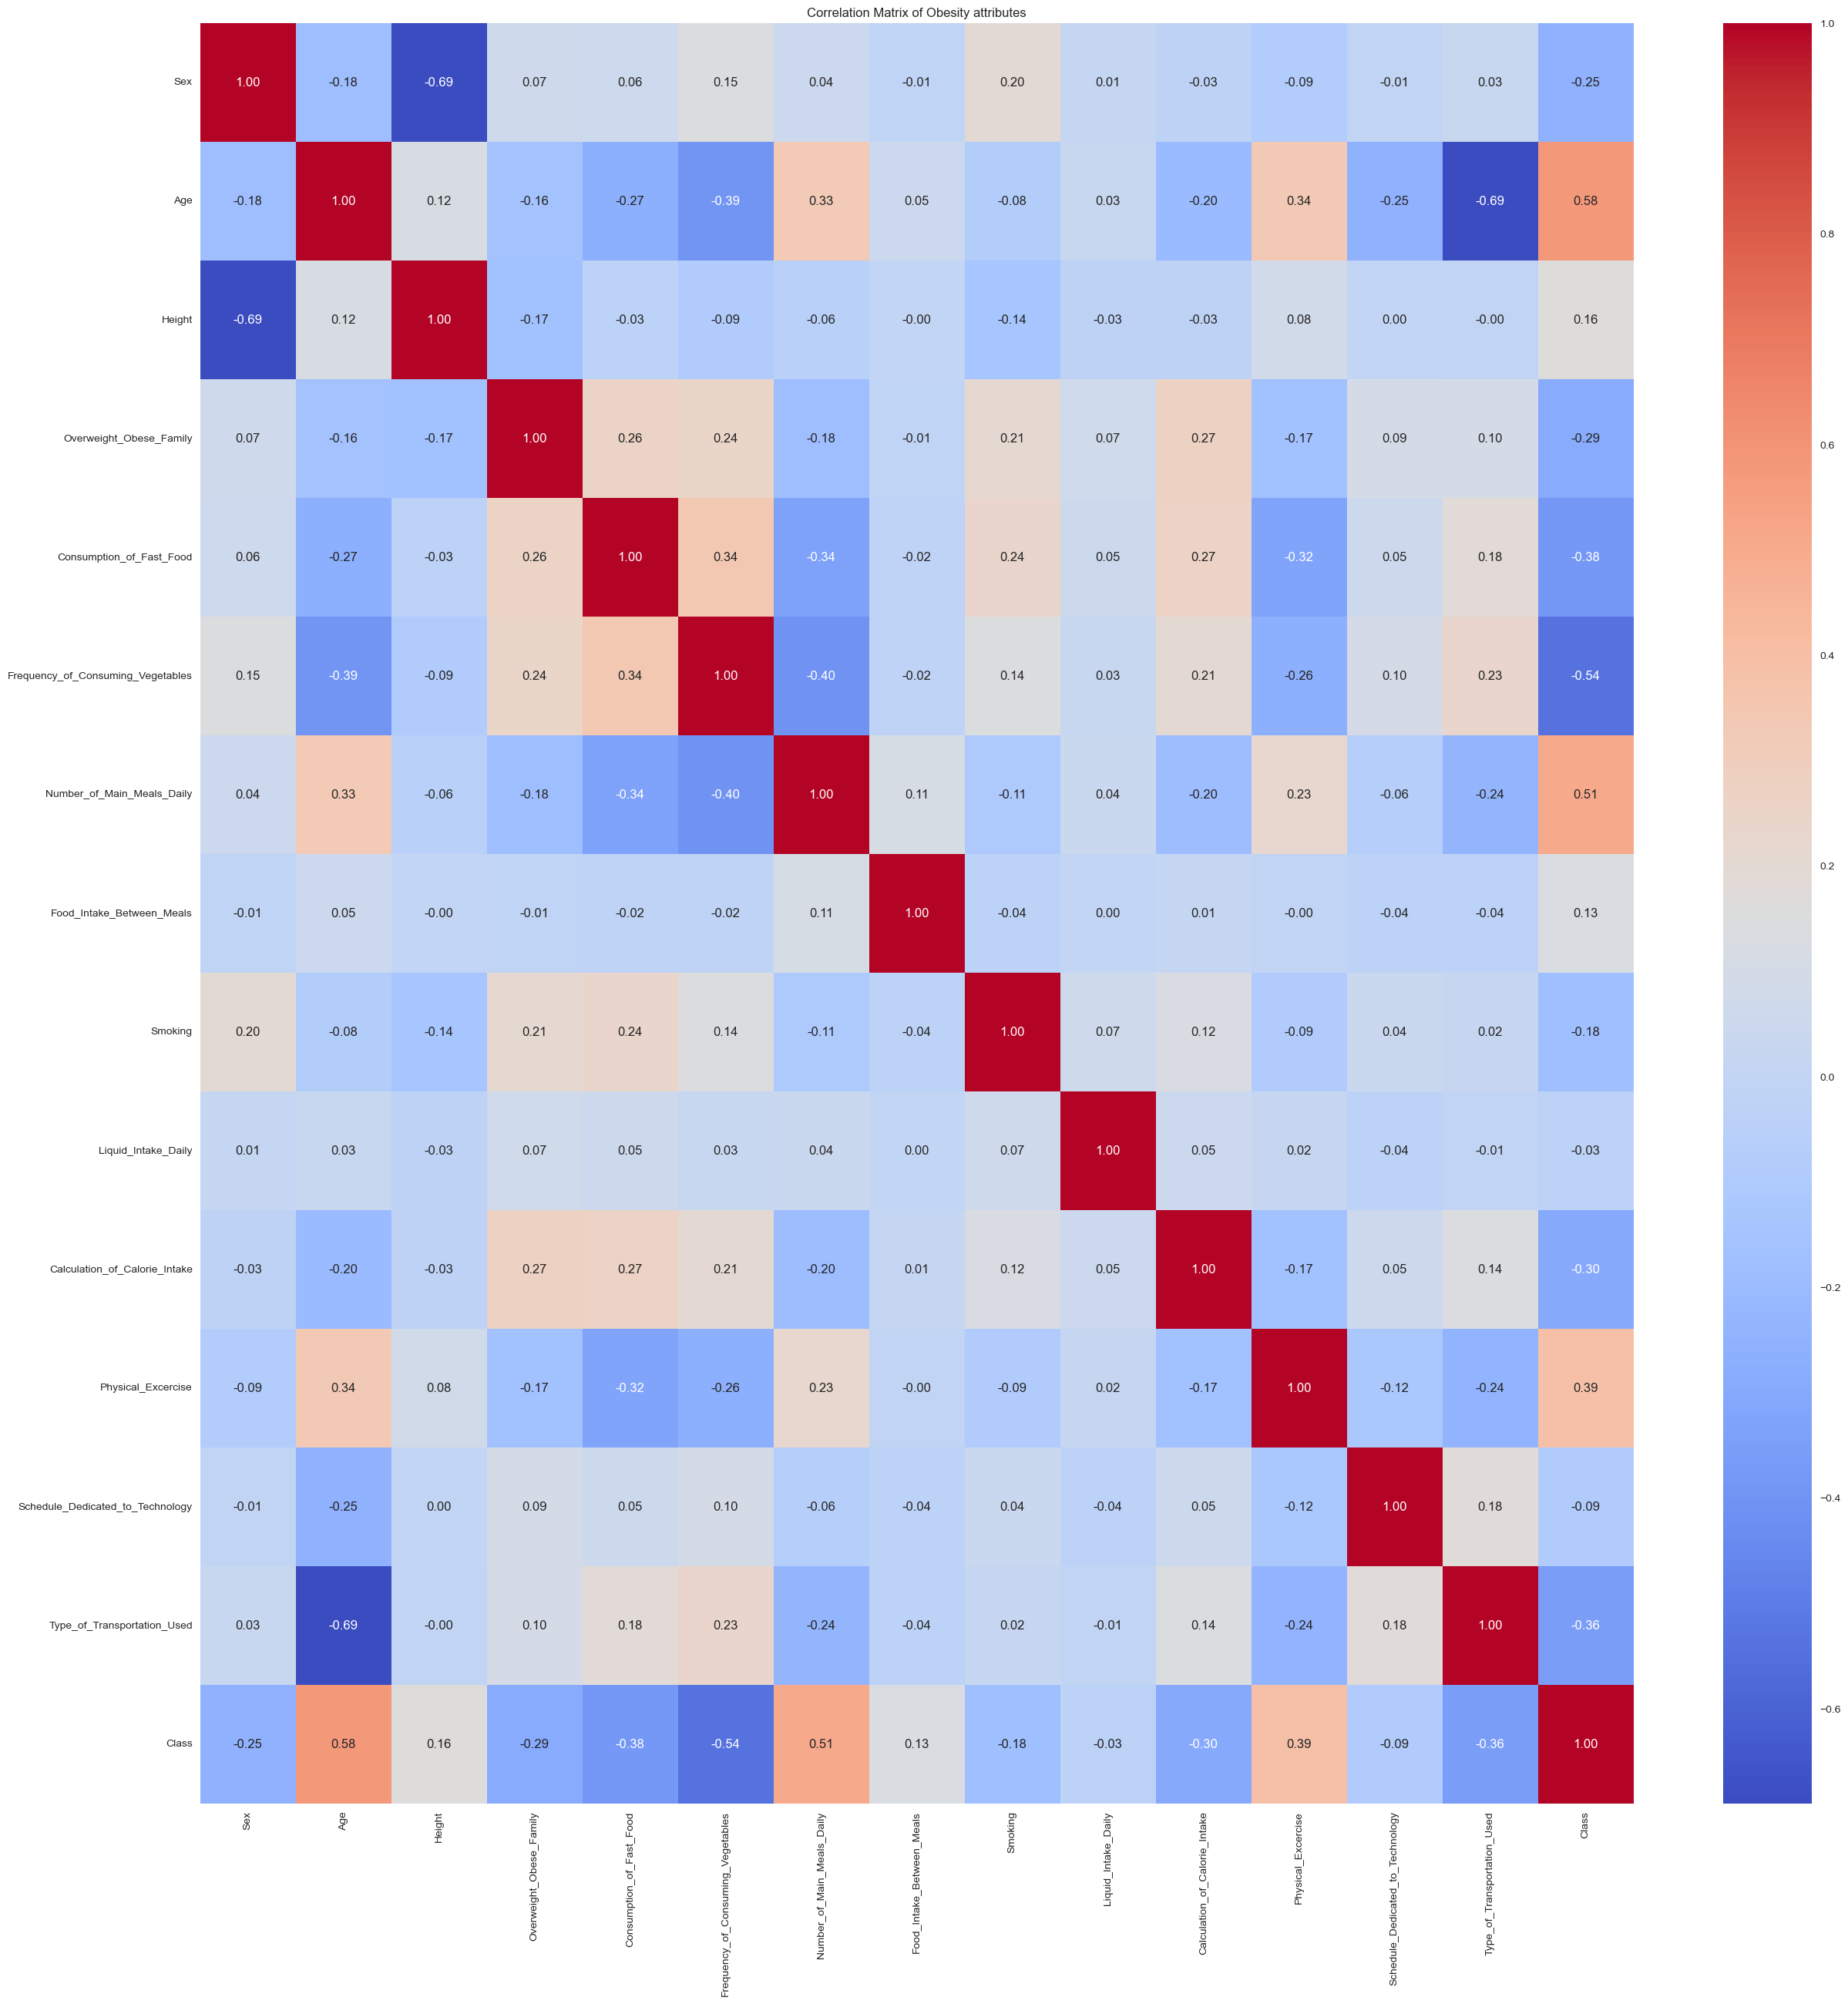

In [37]:
numeric_columns = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Obesity attributes')
plt.show()

In [38]:
#From this we determine that age and number of daily meals are the most important attributes

In [39]:
#Unsupervised learning

In [40]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
# We try training models for all possible number of clusters in the range and calculate their distrtion
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
# print all distortions to identify the lowest gain
print("Distortion: ", distortions)

Distortion:  [2.480680383019491, 2.323014327750273, 2.220640005529664, 2.1629393153912235, 2.114570498492319, 2.0607748019523777, 2.0326997315150246, 1.9998488212787282]


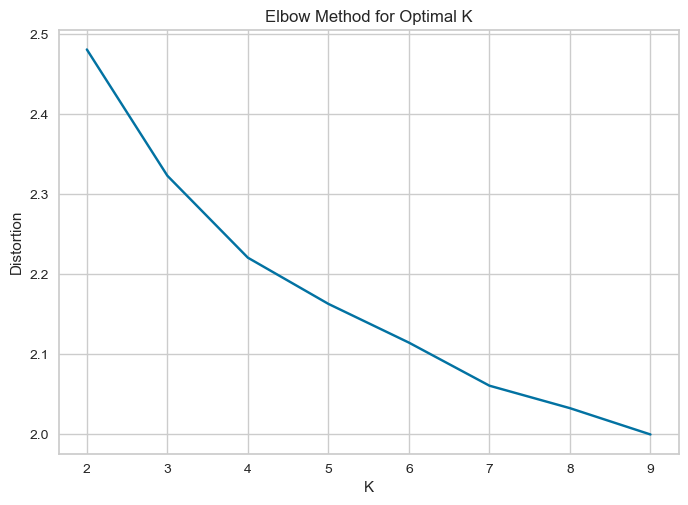

In [41]:
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [42]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df)
    score = metrics.silhouette_score(df, model.labels_, metric='euclidean', sample_size=len(df))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.2562545998900328

Number of clusters = 3
Silhouette score = 0.20979330654840292

Number of clusters = 4
Silhouette score = 0.17752006191696143

Number of clusters = 5
Silhouette score = 0.1629736151956088

Number of clusters = 6
Silhouette score = 0.13699334359001253

Number of clusters = 7
Silhouette score = 0.13676487794065254

Number of clusters = 8
Silhouette score = 0.12815519652411245

Number of clusters = 9
Silhouette score = 0.12383395705891827


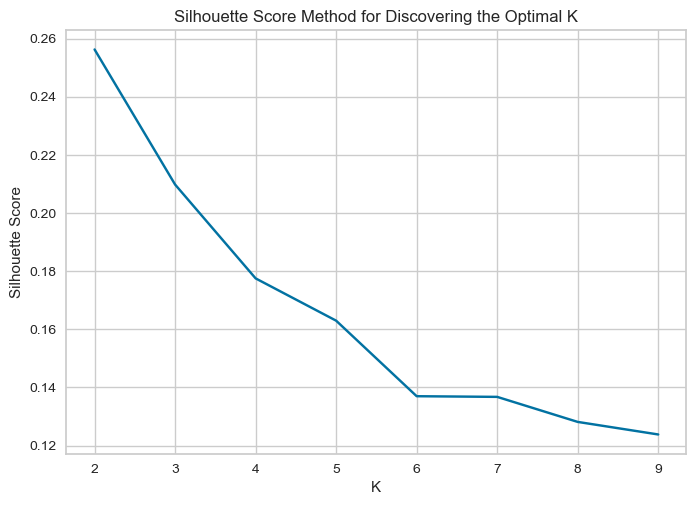

In [43]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [44]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df)
    score = metrics.silhouette_score(df, model.labels_, metric='euclidean', sample_size=len(df))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.2562545998900328

Number of clusters = 3
Silhouette score = 0.20977390830629572

Number of clusters = 4
Silhouette score = 0.17752006191696137

Number of clusters = 5
Silhouette score = 0.1629736151956088

Number of clusters = 6
Silhouette score = 0.13744264345633975

Number of clusters = 7
Silhouette score = 0.13705509170529107

Number of clusters = 8
Silhouette score = 0.1268498623330091

Number of clusters = 9
Silhouette score = 0.12226373938502774


In [45]:
# Optimal number of clusters K (seems to be 2)
num_clusters = 2

In [46]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

# Train the KMeans clustering model
kmeans.fit(df)



KMeans(n_clusters=2, n_init=20)

In [47]:
# Predict 2 clusters in df
y = kmeans.predict(df)
y

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


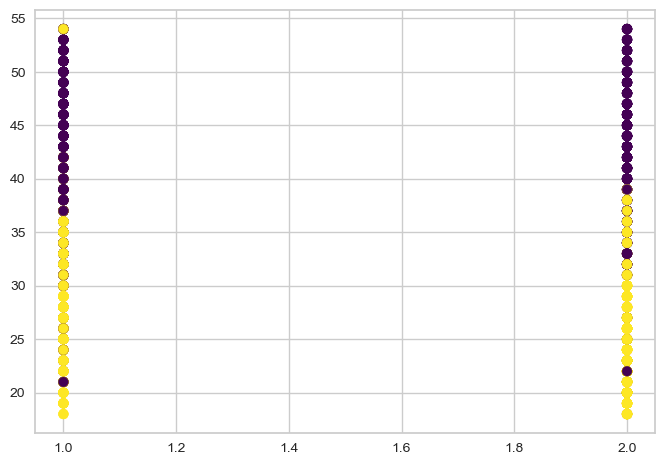

In [49]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [50]:
print(kmeans.cluster_centers_)

[[1.51724138 0.64068966 0.42255012 1.78758621 1.62896552 1.8262069
  2.07310345 2.43310345 1.67724138 2.11172414 1.75724138 3.71172414
  1.85103448 1.08965517 3.05793103]
 [1.59096045 0.23898305 0.40444094 1.87344633 1.81129944 2.25762712
  1.70734463 2.36497175 1.70847458 2.10621469 1.87570621 2.90056497
  2.14463277 3.95932203 2.36836158]]


In [51]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
#step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
#x_coord = np.arange(x_min, x_max, step_size)
#y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
#x_vals, y_vals = np.meshgrid(x_coord, y_coord)

from sklearn.decomposition import PCA

# Reduce the 15-dimensional data to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)  # scaled_data is your original dataset with 15 features

# Fit KMeans on the 2D data
kmeans_2d = KMeans(n_clusters=4, random_state=42)
kmeans_2d.fit(data_2d)

# Create a grid of points for prediction (like you were doing)
x_min, x_max = data_2d[:, 0].min() - 1, data_2d[:, 0].max() + 1
y_min, y_max = data_2d[:, 1].min() - 1, data_2d[:, 1].max() + 1

In [52]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)


# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [53]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
print(xx)
print(yy)
#labels = kmeans.predict(np.c_[xx,yy])
labels = kmeans_2d.predict(np.c_[xx, yy])
labels = labels.reshape(x_vals.shape)


[-4.25141102 -4.24141102 -4.23141102 ...  4.87858898  4.88858898
  4.89858898]
[-4.17279564 -4.17279564 -4.17279564 ...  4.27720436  4.27720436
  4.27720436]


In [54]:
#Getting an error here

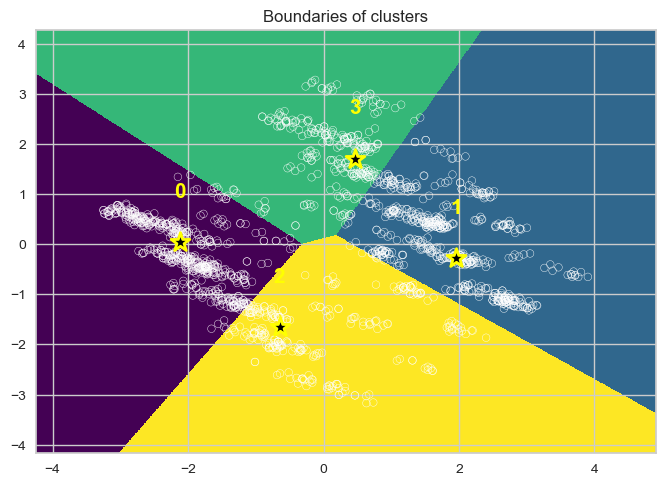

In [55]:
# Plot the clusters
# create new plot area
centers_2d = kmeans_2d.cluster_centers_
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
#plt.scatter(x[:,0], x[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 
plt.scatter(data_2d[:, 0], data_2d[:, 1], marker='o', facecolors='none', edgecolors='white', s=30)

# plot the centroids
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers_2d):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

In [56]:
k = 2
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(df)

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
score = silhouette_score(df, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.256


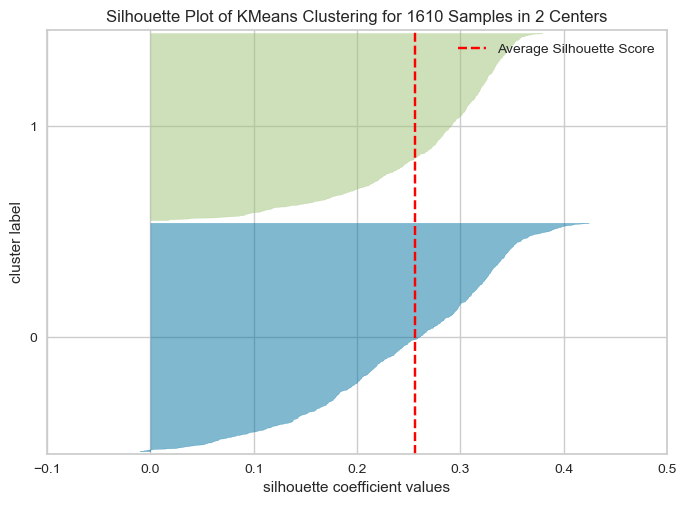

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1610 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)
visualizer.show() 

In [59]:
#Supervised Learning

In [60]:
#Preperation for training

In [61]:
# Splitting features and target variable
X = df.drop('Class', axis=1)  # Features
# Create binary classification for 'Obese Risk'
# 1: At Risk (Obese), 0: Not at Risk (Underweight, Normal, Overweight)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)

# Print the target variable
# Print the target variable distribution
print("Target Variable (y): Obesity Risk")
print(y.value_counts())  # Shows distribution of 0 and 1 (Not at Risk vs At Risk)

# Define class names for confusion matrix and reports
class_names = ['Not at Risk', 'At Risk']

Target Variable (y): Obesity Risk
Class
0    1323
1     287
Name: count, dtype: int64


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [63]:
#Apply scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [64]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [65]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.990683   0.990651  0.990683  0.990651
1                KNN  0.922360   0.919436  0.922360  0.919681
2       DecisionTree  1.000000   1.000000  1.000000  1.000000
3       RandomForest  1.000000   1.000000  1.000000  1.000000
4                XGB  1.000000   1.000000  1.000000  1.000000
5                SVM  1.000000   1.000000  1.000000  1.000000


In [66]:
rf = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(rf,params ,cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:",grid_search.best_params_)
print("Best score:",grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best score: 1.0


In [141]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE on the training data to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape:', Counter(y_train_resampled))
rf = RandomForestClassifier(max_depth= None, n_estimators= 100)
rf.fit(X_train_resampled, y_train_resampled)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Resampled dataset shape: Counter({0: 1058, 1: 1058})
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00        57

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322



In [68]:
# View confusion matrix for test data and predictions
cmat = confusion_matrix(y_test, y_pred)
print(cmat)
print(classification_report(y_test, y_pred))

[[265   0]
 [  0  57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00        57

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322



In [69]:
print(df['Class'].value_counts())

Class
2    658
3    592
4    287
1     73
Name: count, dtype: int64


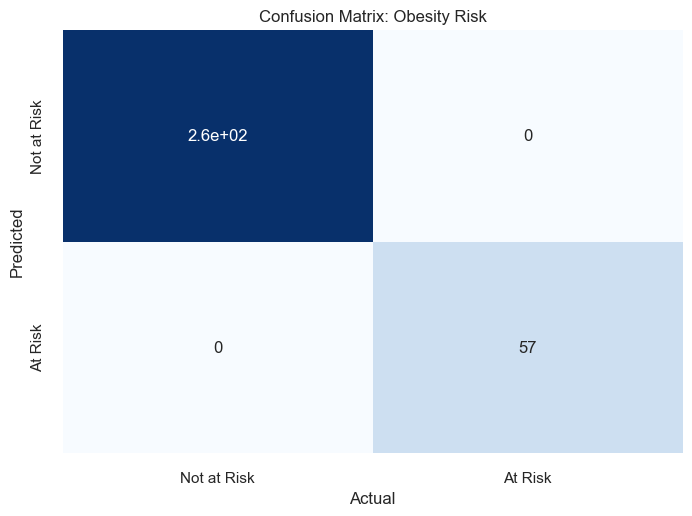

In [70]:
sns.set()
sns.heatmap(cmat.T, square=False, annot=True, cbar=False,
            xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix: Obesity Risk')
plt.show()